## 1. 为什么要做数据归一化？

以KNN算法为例，目前有两个肿瘤病人样本，每个样本有两个特征：
1. 肿瘤大小（cm）
2. 发现时间（天）

样本1：1cm，200天  
样本2：5cm，100天  
计算两个样本间的距离时，会发现时间起了主导作用。可以发现，如果不对数据进行一些基本处理，直接计算两个样本的距离时，可能有偏差。故要做数据归一化，即将所有的数据映射到同一尺度。  
常见的归一化方法：
1. 最值归一化：把所有数据映射到0-1之间，适用于分布有明显边界的情况，缺点是受outlier（没有明显边界）影响比较大。
2. 均值归一化：把所有的数据归一到均值为0，方差为1的分布中。适用于没有明显边界，可能存在极端数据值的情况。有明显边界使用该归一化方法也是有效的。**推荐**

## 2. 最值归一化

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randint(0, 100, 100)  # 生成100个范围在[0,100)的随机数
x

array([ 8, 60,  6, 28, 60, 17, 84, 27,  8, 60, 68, 21, 23, 66, 98, 59, 62,
       28, 27, 55, 43, 17,  3,  2, 79, 68, 90, 86, 20, 88, 40, 59, 90, 82,
       44, 77,  6, 95, 34, 77, 11, 24, 16, 46, 83, 82, 33,  8, 31, 46, 80,
       72,  3,  7,  2, 47,  4, 32, 39, 59, 62, 20, 40, 84,  5, 94, 86, 45,
       18, 83, 22, 86, 20,  6,  9, 16,  2, 34, 41, 74, 11, 85, 32, 47, 90,
       29, 93, 71, 53, 92, 11, 33, 33, 65, 83, 50,  3, 80, 38, 68])

In [3]:
# 进行最值归一化
(x - np.min(x)) / (np.max(x) - np.min(x))

array([0.0625    , 0.60416667, 0.04166667, 0.27083333, 0.60416667,
       0.15625   , 0.85416667, 0.26041667, 0.0625    , 0.60416667,
       0.6875    , 0.19791667, 0.21875   , 0.66666667, 1.        ,
       0.59375   , 0.625     , 0.27083333, 0.26041667, 0.55208333,
       0.42708333, 0.15625   , 0.01041667, 0.        , 0.80208333,
       0.6875    , 0.91666667, 0.875     , 0.1875    , 0.89583333,
       0.39583333, 0.59375   , 0.91666667, 0.83333333, 0.4375    ,
       0.78125   , 0.04166667, 0.96875   , 0.33333333, 0.78125   ,
       0.09375   , 0.22916667, 0.14583333, 0.45833333, 0.84375   ,
       0.83333333, 0.32291667, 0.0625    , 0.30208333, 0.45833333,
       0.8125    , 0.72916667, 0.01041667, 0.05208333, 0.        ,
       0.46875   , 0.02083333, 0.3125    , 0.38541667, 0.59375   ,
       0.625     , 0.1875    , 0.39583333, 0.85416667, 0.03125   ,
       0.95833333, 0.875     , 0.44791667, 0.16666667, 0.84375   ,
       0.20833333, 0.875     , 0.1875    , 0.04166667, 0.07291

In [4]:
# 对矩阵进行归一化
X = np.random.randint(0, 100, (50, 2)) # 生成一个50 * 2的矩阵，每个元素的范围是[0,100)
X[:10, :]  # 观察前10个样本

array([[60, 36],
       [ 2, 41],
       [30, 11],
       [91,  7],
       [71, 73],
       [77, 77],
       [54, 92],
       [85, 60],
       [31, 75],
       [40, 13]])

In [5]:
# 因为我们归一化得到的结果是浮点数，而randint得到的整型，对它进行操作得到的仍是整型。故需要对X进行强制类型转换
X = np.array(X, dtype=float)
X[:10, :]

array([[60., 36.],
       [ 2., 41.],
       [30., 11.],
       [91.,  7.],
       [71., 73.],
       [77., 77.],
       [54., 92.],
       [85., 60.],
       [31., 75.],
       [40., 13.]])

In [6]:
# 对第一个特征（第一列）做归一化
X[:, 0] = (X[:, 0] - np.min(X[:, 0])) / (np.max(X[:, 0]) - np.min(X[:, 0]))
# 对第二个特征（第二列）做归一化
X[:, 1] = (X[:, 1] - np.min(X[:, 1])) / (np.max(X[:, 1]) - np.min(X[:, 1]))
# 观察归一化后的前10个样本
X[:10, :]  # 做了最值归一化后，数据范围[0, 1]

array([[0.62105263, 0.36363636],
       [0.01052632, 0.41414141],
       [0.30526316, 0.11111111],
       [0.94736842, 0.07070707],
       [0.73684211, 0.73737374],
       [0.8       , 0.77777778],
       [0.55789474, 0.92929293],
       [0.88421053, 0.60606061],
       [0.31578947, 0.75757576],
       [0.41052632, 0.13131313]])

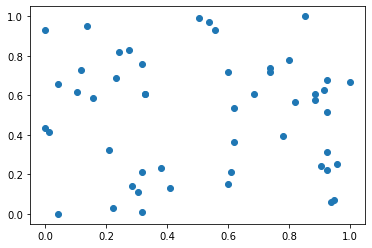

In [7]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [9]:
# 观察第一列数据的均值和方差 
np.mean(X[:, 0]), np.std(X[:, 0]), np.mean(X[:, 1]), np.std(X[:, 1])

(0.5193684210526315,
 0.3203364574683617,
 0.5060606060606061,
 0.2905528823661546)

## 3. 均值方差归一化

In [10]:
X2 = np.random.randint(0, 100, (50, 2))
X2 = np.array(X2, dtype = float)  # 数据类型转换
X2[:10, :]

array([[94., 93.],
       [64.,  5.],
       [75., 59.],
       [21., 45.],
       [91., 41.],
       [19., 59.],
       [63., 49.],
       [30.,  3.],
       [33., 52.],
       [89., 99.]])

In [11]:
X2[:, 0] = (X2[:, 0] - np.mean(X2[:, 0])) / np.std(X2[:, 0])  # 均方差归一化
X2[:, 1] = (X2[:, 1] - np.mean(X2[:, 1])) / np.std(X2[:, 1])

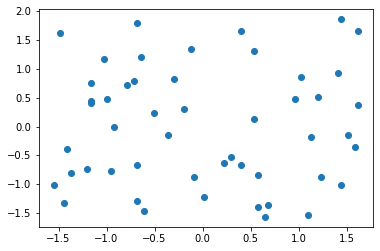

In [12]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [13]:
# 观察第一列数据的均值和方差 
np.mean(X2[:, 0]), np.std(X2[:, 0]), np.mean(X2[:, 1]), np.std(X2[:, 1])   # 均值为0，方差为1

(1.4210854715202004e-16, 1.0, 8.881784197001253e-17, 1.0)